In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('another2.csv', dtype='object')

In [3]:
info_column = df['Info'].str.split(',', expand=True) # split whenever a comma found
df['Type'] = info_column[0]
df['SN'] = info_column[1]
df['FN'] = info_column[2]
df['Flags'] = info_column[3]
df['BI'] = info_column[4]
df['SSID'] = info_column[5]
df.drop(columns=['Info'], inplace=True)
df

,No.,Time,Source,Destination,Protocol,Length,Type,SN,FN,Flags,BI,SSID
0,1,0.000000,Apple_67:02:a2,Broadcast,802.11,141,Probe Request,SN=1465,FN=0,Flags=........,SSID=eduroam,None
1,2,0.018547,Apple_67:02:a2,Broadcast,802.11,141,Probe Request,SN=1466,FN=0,Flags=........,SSID=eduroam,None
2,3,0.033798,IntelCor_6d:e1:6f,Broadcast,802.11,88,Probe Request,SN=1755,FN=0,Flags=........,SSID=Wildcard (Broadcast),None
3,4,0.260860,Google_5c:2e:2c,Broadcast,802.11,104,Probe Request,SN=363,FN=0,Flags=........,SSID=Wildcard (Broadcast),None
4,5,0.858080,HonHaiPr_9e:df:47,Broadcast,802.11,99,Probe Request,SN=378,FN=0,Flags=........,SSID=@BayernWLAN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
168054,168055,39788.839033,Apple_6a:b5:e9,Broadcast,802.11,101,Probe Request,SN=3863,FN=0,Flags=........,SSID=Wildcard (Broadcast),None
168055,168056,39788.882710,IntelCor_b0:ed:5c,Broadcast,802.11,98,Probe Request,SN=701,FN=0,Flags=...P....,SSID=Wildcard (Broadcast),None
168056,168057,39788.886583,IntelCor_b0:ed:5c,Broadcast,802.11,98,Probe Request,SN=703,FN=0,Flags=...P....,SSID=Wildcard (Broadcast),None
168057,168058,39790.404344,XiaomiCo_93:33:5b,Broadcast,802.11,122,Probe Request,SN=474,FN=0,Flags=........,SSID=Wildcard (Broadcast),None


In [4]:
types = df.groupby('Type').Source.count()
types
probes = df.query('Type == "Probe Request"')
probes.count
probes

,No.,Time,Source,Destination,Protocol,Length,Type,SN,FN,Flags,BI,SSID
0,1,0.000000,Apple_67:02:a2,Broadcast,802.11,141,Probe Request,SN=1465,FN=0,Flags=........,SSID=eduroam,None
1,2,0.018547,Apple_67:02:a2,Broadcast,802.11,141,Probe Request,SN=1466,FN=0,Flags=........,SSID=eduroam,None
2,3,0.033798,IntelCor_6d:e1:6f,Broadcast,802.11,88,Probe Request,SN=1755,FN=0,Flags=........,SSID=Wildcard (Broadcast),None
3,4,0.260860,Google_5c:2e:2c,Broadcast,802.11,104,Probe Request,SN=363,FN=0,Flags=........,SSID=Wildcard (Broadcast),None
4,5,0.858080,HonHaiPr_9e:df:47,Broadcast,802.11,99,Probe Request,SN=378,FN=0,Flags=........,SSID=@BayernWLAN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
168054,168055,39788.839033,Apple_6a:b5:e9,Broadcast,802.11,101,Probe Request,SN=3863,FN=0,Flags=........,SSID=Wildcard (Broadcast),None
168055,168056,39788.882710,IntelCor_b0:ed:5c,Broadcast,802.11,98,Probe Request,SN=701,FN=0,Flags=...P....,SSID=Wildcard (Broadcast),None
168056,168057,39788.886583,IntelCor_b0:ed:5c,Broadcast,802.11,98,Probe Request,SN=703,FN=0,Flags=...P....,SSID=Wildcard (Broadcast),None
168057,168058,39790.404344,XiaomiCo_93:33:5b,Broadcast,802.11,122,Probe Request,SN=474,FN=0,Flags=........,SSID=Wildcard (Broadcast),None


In [5]:
(df['SSID'].unique())

array([None, ' SSID=DIRECT-OSDESKTOP-3LK0H5PmsJe', ' Rail Services Wifi',
       ' SSID=DIRECT-TJDESKTOP-FFS8F7LmsOZ', ' SSID=HUAWEI Mate 10 Pro',
       ' SSID=GlocalMe_28112', ' SSID=Mi Phone iwis',
       ' SSID=DIRECT-zNPORTLTILmsNO', ' SSID=iPhone',
       ' SSID=DIRECT-CURENE-SBmsQU'], dtype=object)

In [6]:
unique_sources = df['Source'].value_counts()
to_remove = unique_sources[unique_sources <= 100].index
df = df[~df['Source'].isin(to_remove)]
res = df['Source'].value_counts()
res
listt = []

rq = dict.fromkeys(listt, None)
rq





{}

In [7]:
dataFrameOut1 = df[df['Source'].str.match('Motorola')]
rq['Motorola']=len(dataFrameOut1.index)


In [8]:
dataFrameOut1 = df[df['Source'].str.match('Samsung')]
rq['Samsung']=len(dataFrameOut1.index)


In [9]:
dataFrameOut1 = df[df['Source'].str.match('Liteon')]
rq['Liteon']=len(dataFrameOut1.index)


In [10]:
dataFrameOut = df[df['Source'].str.match('5e:51')]
rq['Unknown'] = len(dataFrameOut.index)

In [11]:
dataFrameOut = df[df['Source'].str.match('Huawei')]
rq['Huawei'] = len(dataFrameOut.index)

In [12]:
dataFrameOut = df[df['Source'].str.match('Apple')]
rq['Apple'] = len(dataFrameOut.index)

In [13]:
rq

{'Motorola': 368,
 'Samsung': 2403,
 'Liteon': 5301,
 'Unknown': 75501,
 'Huawei': 936,
 'Apple': 17011}

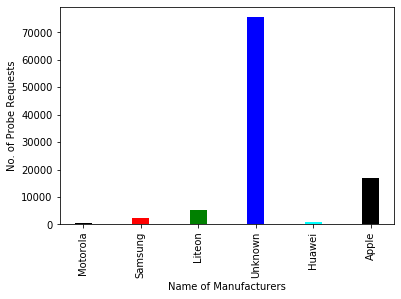

In [14]:
names = list(rq.keys())
values = list(rq.values())
plt.xlabel('Name of Manufacturers')
plt.ylabel('No. of Probe Requests')
#tick_label does the some work as plt.xticks()
plt.bar(range(len(rq)),values,tick_label=names,width=0.3,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.savefig('bar.png')
plt.xticks(rotation=90)
plt.show()
